In [227]:
import geopandas as gpd
from matplotlib import pyplot as plt
import cartopy
import pandas as pd
import networkx as nx
import networkx.algorithms as algos
from functools import partial
import re
import numpy as np
from importlib import reload

import functions
reload(functions)

<module 'functions' from '/Users/hugoschwabe/Documents/Code/bachelor-thesis/functions.py'>

# Initialize and Process Full Graph

In [229]:
original = nx.read_gml("./data/de2025_simp.gml")

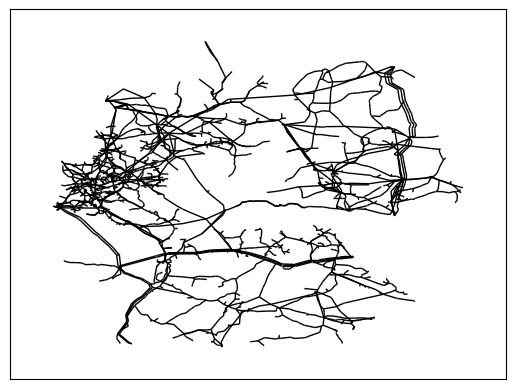

In [230]:
original_pos = {node: (data["coord"]) for node, data in original.nodes(data=True)}
nx.draw_networkx_edges(original, original_pos, arrows=False)

# Initialize NUTS Regions

In [231]:
nuts3 = gpd.read_file("./data//NUTS3/NUTS_RG_20M_2024_4326.shp").set_index("NUTS_ID")
nuts3 = nuts3[nuts3["LEVL_CODE"] == 3]
nuts3.head(3)

,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,geometry
NUTS_ID,,,,,,,,
AL011,3,AL,Dibër,Dibër,NaN,NaN,NaN,"POLYGON ((20.2208 41.86937, 20.56287 41.84614,..."
AL012,3,AL,Durrës,Durrës,NaN,NaN,NaN,"POLYGON ((19.55733 41.57767, 19.83218 41.56823..."
AL013,3,AL,Kukës,Kukës,NaN,NaN,NaN,"POLYGON ((20.59429 41.87733, 20.56287 41.84614..."


<GeoAxes: >

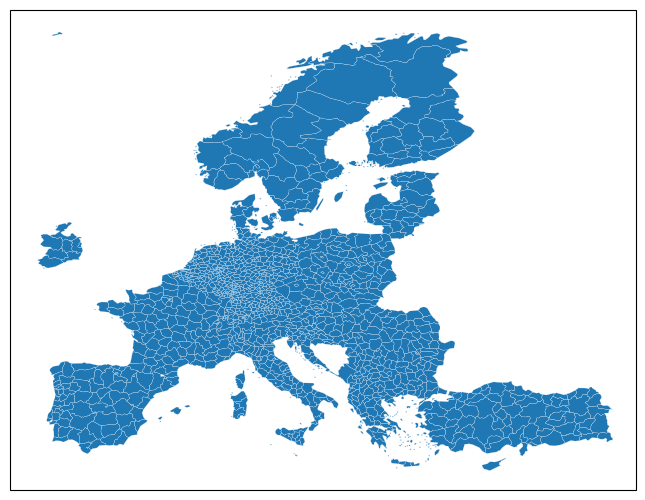

In [232]:
ax = plt.axes(
	[0, 0, 1, 1],
    projection=cartopy.crs.PlateCarree(),
	)

extent = [-13, 47, 33, 73]
ax.set_extent(extent, cartopy.crs.PlateCarree())

nuts3.plot(
	ax=ax,
	edgecolor='white',
	linewidth=0.15,

	)

# Run the Algorithms

In [240]:
from networkx.algorithms.community import greedy_modularity_communities, louvain_communities

# Visualization and Investigation

In [241]:
greedy_modularity_results = functions.run_algo(original, greedy_modularity_communities)

Gefundene Communities: 71
Modularität Q = 0.9595979256171069


In [242]:
greedy_modularity_graph = functions.build_results_graph(original, results=greedy_modularity_results)

In [243]:
louvain_results = functions.run_algo(original, partial(louvain_communities, seed=42))

Gefundene Communities: 76
Modularität Q = 0.9598252413510922


In [244]:
louvain_graph = functions.build_results_graph(original, results=louvain_results)

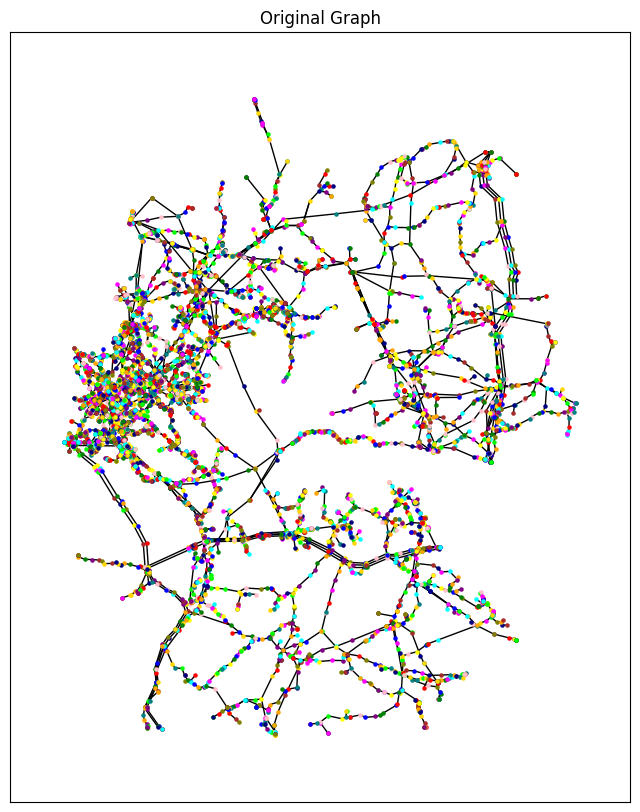

In [245]:
functions.plot_network(
	graph=original,
	node_size=5, 
	title="Original Graph"
)

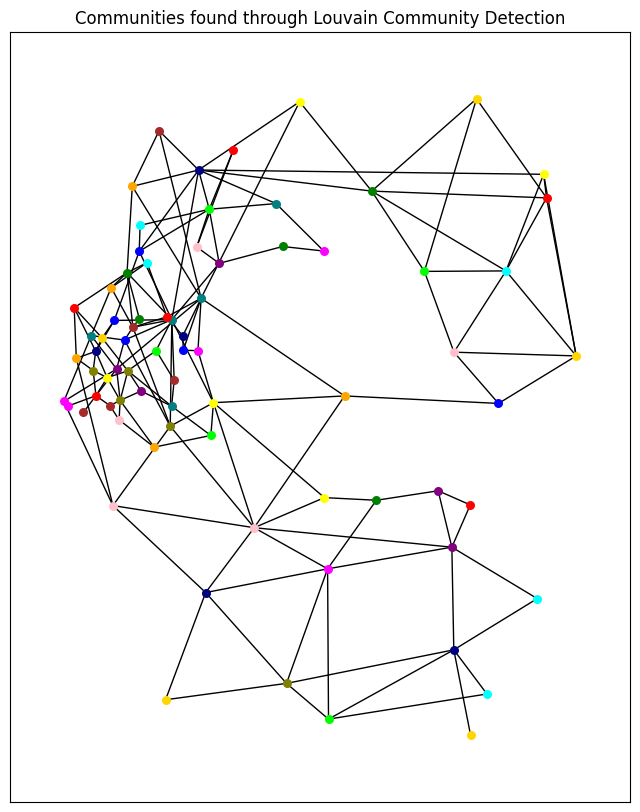

In [246]:
functions.plot_network(
	graph=louvain_graph,
	node_size=30, 
	title="Communities found through Louvain Community Detection"
)

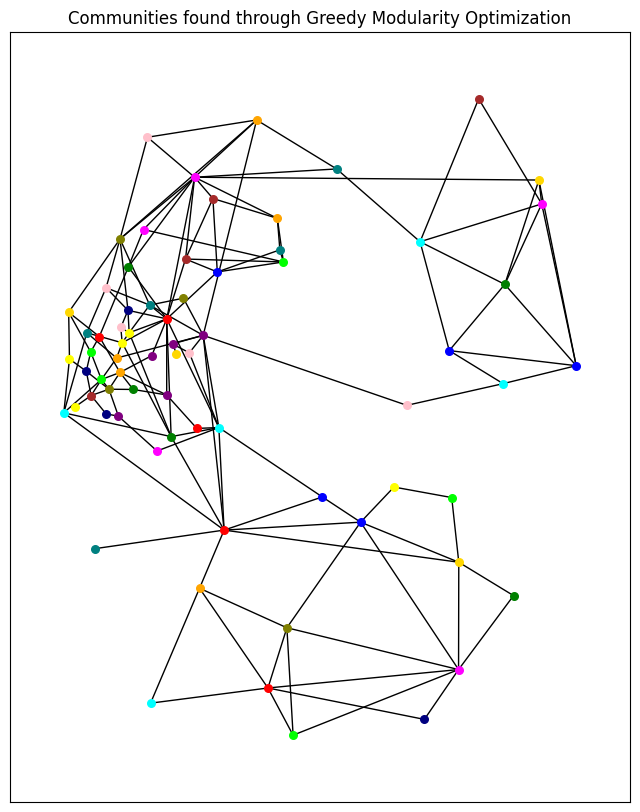

In [247]:
functions.plot_network(
	graph=greedy_modularity_graph,
	node_size=30, 
	title="Communities found through Greedy Modularity Optimization"
)